Python Assignment
Jacob Zobrist E
EEOB 546 Fall 2018

Install Biopython via conda.

```python
conda install biopython
```

In [1]:
from Bio import SeqIO
from Bio import Seq
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.Data import CodonTable
import pandas as pd
import matplotlib as plt
from Bio.SeqUtils import molecular_weight
from Bio.SeqUtils import GC
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import urllib
import urllib.request
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

#This is used to create the environemnt to run all of the programs in biopython and my Jupyter Notebook. 

# 1.  Document Dr. X's function with comments and with markdown text in your Jupyter notebook.

1. defines function "get_sequences_from_file" which will put into file "fasta_fn"
2. creates a new directory "sequence_data_dict" 
3. SeqIO is the sequence Input/Output interface. Takes a file handle and format name and returns a SeqRecord. Will allow us find squences in the file.  
5. pulls the species name from the fasta file
6. Matches the sequence=value to the correct species=key in the dicitionary 
7. returns a file that contains finished dicitonary with matched secquence and species2. 

https://biopython.org/wiki/SeqIO

In [2]:
#Reads in FASTA file and returns a ditctionary by species name
def get_sequences_from_file(fasta_fn):   #Defines function "get_sequences_from_file" which will put into file "fasta_fn"                      
    sequence_data_dict = {}              #Creates a new directory "sequence_data_dict"                     
    for record in SeqIO.parse(fasta_fn, "fasta"): #Gets Species name from fasta uses the species name as the key for sequences            
        description = record.description.split()             
        species_name = description[1] + " " + description[2]   
        sequence_data_dict[species_name] = record.seq  #Assigns the value to the key in the dictionary        
    return(sequence_data_dict)  #Return a dictionary with sequence data and species name

# 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion

I need a command to translate DNA sequence into Ammino Acid Sequence. https://stackoverflow.com/questions/19521905/translation-dna-to-protein


1. defines a new function to translate a string of nucleotides 
2. Codon table with all information
3. Create variable to hold new amino acid sequence 
4. Codons for AA are every 3 nucleotides. This loop identifies codons
5. Translate the nucleotides into AA and add them to an AA string
6. End the loop and return the amino acid string

In [3]:
def translate_function(string_nucleotides): #defines function "translate_function" which will put into a string                                         
     codon_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # Defines table with all codon to AA information   
     aa_seq_string = ""  # New Variable to hold AA Sequence                                                            
     for i in range(0, len(string_nucleotides), 3): # Counts in threes for codons starting with first                                 
         codon=string_nucleotides[i]+string_nucleotides[i+1]+string_nucleotides[i+2] #Codon is 3 nucleotides which code for AA
         if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG":    #Identifies the stop codons
                break
         else:                                                                       
                aa_seq_string += codon_table.forward_table[codon] #Non stop codons are added to the list as AA 
     return(aa_seq_string) #complete AA sequence with stop codons excluded from analysis

Print command to make sure the table is correct in showing the AA sequences 

In [4]:
codon_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(codon_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [5]:
#This is to get pull in bear files. I Put it here and below because of an error and I needed to play with the real data sequences to figure out what was going wrong.  
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

bears_df = pd.read_csv("bears_mass.csv") 
bar_bears_df = pd.read_csv("bears_mass.csv") # added by me to create a data frame for a bar graph later. Could pull from bears_df. 
species_list = list(bears_df.species)

# 3. Write an alternative translation function.

Take some of the stuff we learned from the class lectures to play with the data. my_seq is information to test some of these commands without touching the given data files for hw. 

In [6]:
my_seq = Seq('AGTACACTGGT', IUPAC.unambiguous_dna)

Information from Biopython lecture. dir command is used to show other commands available for me to use and see what is there. 

In [7]:
dir(my_seq)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data',
 '_get_seq_str_and_check_alphabet',
 'alphabet',
 'back_transcribe',
 'complement',
 'count',
 'count_overlap',
 'endswith',
 'find',
 'lower',
 'lstrip',
 'reverse_complement',
 'rfind',
 'rsplit',
 'rstrip',
 'split',
 'startswith',
 'strip',
 'tomutable',
 'tostring',
 'transcribe',
 'translate',
 'ungap',
 'upper']

In [8]:
coding_dna=Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG", IUPAC.unambiguous_dna) 

Found a utility in Bio.SeqUtils. Seems really easy like I am doing something wrong. 

In [9]:
 coding_dna.translate()  # used in lecture

Seq('MAIVMGR*KGAR*', HasStopCodon(IUPACProtein(), '*'))

# 4. Write a function that calculates the molecular weight of each amino acid sequence. 

The following codes came from Iddo Lecture

In [10]:
my_seq #look at lecture seq. 

Seq('AGTACACTGGT', IUPACUnambiguousDNA())

Another utility from Bio.SeqUtils. 

In [11]:
 print(molecular_weight(my_seq)) #molecular weight command from lecture

3436.1957000000007


Realized previous command is giving me molecular weight of DNA but I can set it to calcualte molecular weight of AA by setting seq_type = 'protein'

In [12]:
spelaeus_mw = molecular_weight(cytb_seqs['Ursus spelaeus'])
print(cytb_seqs['Ursus spelaeus'])
print()
print(translate_function(cytb_seqs['Ursus spelaeus']))
print("Protein weight is: {}".format(
    molecular_weight(translate_function(cytb_seqs['Ursus spelaeus']), seq_type = 'protein')))
spelaeus_mw

ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTTATTGACCTCCCAACACCATCAAACATCTCAGCATGATGAAACTTTGGATCCCTCCTCGGAGTATGCTTAATTCTACAGATCCTAACAGGCCTGTTTCTAGCTATACACTACACATCAGACACAACCACAGCCTTTTCATCAATCACCCATATTTGCCGAGACGTTCACTACGGTTGAGTTATCCGATATATACATGCAAACGGAGCCTCCATATTCTTTATCTGTCTATTCATGCACGTAGGACGGGGCCTATACTATGGCTCATACCTATTCTCAGAAACATGAAACATTGGCATTATTCTCCTACTTACAGTCATAGCCACCGCATTCATAGGATATGTCCTACCCTGAGGCCAAATGTCCTTCTGAGGAGCAACTGTCATTACCAACCTACTATCGGCCATTCCCTATATCGGAACGGACCTAGTAGAATGAATCTGAGGAGGCTTTTCCGTAGATAAGGCAACTCTAACACGATTCTTTGCCTTCCACTTTATCCTCCCGTTCATCATCTTAGCACTAGCAGCAGTCCATCTATTGTTTCTACACGAAACAGGATCCAACAACCCCTCTGGAATCCCATCTGACTCAGACAAAATCCCATTTCACCCATACTATACAATTAAGGACATTCTAGGCGCCCTGCTTCTCACTCTAGCTTTAGCAGCTCTAGTCCTATTCTCGCCTGACTTACTAGGAGACCCTGACAACTATACCCCCGCAAACCCACTGAGTACCCCACCCCACATCAAACCCGAGTGGTACTTTCTATTTGCCTACGCTATCCTACGATTTATCCCTAACAAACTAGGAGGAGTACTAGCACTAATCTTCTCCATTCTAATCCTAGCTATCATTTCTCTTCTACACACATCCAAACAACGAGGAATGATATTCCGGCCTCTAAGCCAATGCCTATTCTGACTCCTAGTAGCAGACCTACTAA

348712.8596000003

correct molecular weight for Amino Acids is ~40000

# 5. Write a function that computes the GC-content of each DNA sequence.

In [13]:
my_seq #look at lecture seq. 

Seq('AGTACACTGGT', IUPACUnambiguousDNA())

In [14]:
GC(my_seq) ##GC command from lecture

45.45454545454545

# Main Part of the assignment. Code below from Homwork

Get the sequences from the Fasta file and make data frames for the given files. Given by instructor. 

In [15]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

bears_df = pd.read_csv("bears_mass.csv") 
bar_bears_df = pd.read_csv("bears_mass.csv") # added by me to create a data frame for a bar graph later. Could pull from bears_df. 
species_list = list(bears_df.species)

# 6 Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.
Set the value to 'NaN' to indicate that these cells are currently empty.

Make a copy of the DataFrame to keep the original data and give myself something to go back to if I need it. 

In [16]:
print (bears_df) #Look at current state of df

                  species     mass
0          Ursus spelaeus  550.800
1            Ursus arctos  203.500
2        Ursus thibetanus   99.714
3        Melursus ursinus  100.030
4        Ursus americanus  110.560
5     Helarctos malayanus   47.020
6  Ailuropoda melanoleuca  118.200
7      Tremarctos ornatus  140.700
8         Ursus maritimus  425.100


In [17]:
bears_df["Molecular Weight"]= bears_df.shape [0]*["NaN"] #citation below

https://www.youtube.com/watch?v=t5im-I2399I

Followed the instructions in video to get this piece of code to add both columns and put NaN to mark as empty.

In [18]:
bears_df

,species,mass,Molecular Weight
0,Ursus spelaeus,550.800,NaN
1,Ursus arctos,203.500,NaN
2,Ursus thibetanus,99.714,NaN
3,Melursus ursinus,100.030,NaN
4,Ursus americanus,110.560,NaN
5,Helarctos malayanus,47.020,NaN
6,Ailuropoda melanoleuca,118.200,NaN
7,Tremarctos ornatus,140.700,NaN
8,Ursus maritimus,425.100,NaN


In [19]:
bears_df["GC content"]= bears_df.shape [0]*["NaN"] #same as above to get another column

In [20]:
bears_df

,species,mass,Molecular Weight,GC content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


# 7 Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content

Tested out the translate command for 1 species of bear

In [21]:
spelaeus_translate = translate_function(cytb_seqs['Ursus spelaeus']) #translate function given by Dr. X pull translate 1 sequence
spelaeus_translate 

'MTNIRKTHPLAKIINNSFIDLPTPSNISAWWNFGSLLGVCLILQILTGLFLAMHYTSDTTTAFSSITHICRDVHYGWVIRYMHANGASMFFICLFMHVGRGLYYGSYLFSETWNIGIILLLTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDILGALLLTLALAALVLFSPDLLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRFIPNKLGGVLALIFSILILAIISLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTIPLVLMPIAGIIENNLLKW'

Molecular Weight Check and command test for first species of bear

In [22]:
spelaeus_mw = molecular_weight(cytb_seqs['Ursus spelaeus'])
print(cytb_seqs['Ursus spelaeus'])
print()
print(translate_function(cytb_seqs['Ursus spelaeus']))
print("Protein weight is: {}".format(
    molecular_weight(translate_function(cytb_seqs['Ursus spelaeus']), seq_type = 'protein')))
spelaeus_mw

ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTTATTGACCTCCCAACACCATCAAACATCTCAGCATGATGAAACTTTGGATCCCTCCTCGGAGTATGCTTAATTCTACAGATCCTAACAGGCCTGTTTCTAGCTATACACTACACATCAGACACAACCACAGCCTTTTCATCAATCACCCATATTTGCCGAGACGTTCACTACGGTTGAGTTATCCGATATATACATGCAAACGGAGCCTCCATATTCTTTATCTGTCTATTCATGCACGTAGGACGGGGCCTATACTATGGCTCATACCTATTCTCAGAAACATGAAACATTGGCATTATTCTCCTACTTACAGTCATAGCCACCGCATTCATAGGATATGTCCTACCCTGAGGCCAAATGTCCTTCTGAGGAGCAACTGTCATTACCAACCTACTATCGGCCATTCCCTATATCGGAACGGACCTAGTAGAATGAATCTGAGGAGGCTTTTCCGTAGATAAGGCAACTCTAACACGATTCTTTGCCTTCCACTTTATCCTCCCGTTCATCATCTTAGCACTAGCAGCAGTCCATCTATTGTTTCTACACGAAACAGGATCCAACAACCCCTCTGGAATCCCATCTGACTCAGACAAAATCCCATTTCACCCATACTATACAATTAAGGACATTCTAGGCGCCCTGCTTCTCACTCTAGCTTTAGCAGCTCTAGTCCTATTCTCGCCTGACTTACTAGGAGACCCTGACAACTATACCCCCGCAAACCCACTGAGTACCCCACCCCACATCAAACCCGAGTGGTACTTTCTATTTGCCTACGCTATCCTACGATTTATCCCTAACAAACTAGGAGGAGTACTAGCACTAATCTTCTCCATTCTAATCCTAGCTATCATTTCTCTTCTACACACATCCAAACAACGAGGAATGATATTCCGGCCTCTAAGCCAATGCCTATTCTGACTCCTAGTAGCAGACCTACTAA

348712.8596000003

GC perecentage check and command test for first species of bear

In [23]:
spelaeus_mw = GC(cytb_seqs['Ursus spelaeus'])
spelaeus_mw

43.771929824561404

I have some values and commands and see how they work now I need to design the for loop. 

In [24]:
for bear in bears_df['species']:
    bear_seq = cytb_seqs[bear]
    print(molecular_weight(bear_seq))
    print(GC(bear_seq))

348712.8596000003
43.771929824561404
348796.8787000003
43.771929824561404
348614.69580000016
45.6140350877193
348707.77940000035
45.175438596491226
348766.8559000003
43.94736842105263
348746.8344000003
44.29824561403509
349396.3278000006
40.78947368421053
349059.9576000006
44.3859649122807
348870.8776000003
44.29824561403509


In [25]:
for row_num, row in bears_df.iterrows(): #starts at begining of row and moves through each row in dataframe
    bear_seq = cytb_seqs[row['species']] #pulls sequence by species from cytb_seqs
    bears_df.loc[row_num, 'GC content'] = GC(bear_seq) #uses loc command from lecture to add GC to bear_seq dataframe
    bears_df.loc[row_num, 'Molecular Weight']= molecular_weight(bear_seq)

In [26]:
for row_num, row in bears_df.iterrows():
    bear_seq = cytb_seqs[row['species']] 
    bears_df.loc[row_num, 'GC content'] = GC(bear_seq) 
    bears_df.loc[row_num, 'Molecular Weight']= molecular_weight(bear_seq)

In [27]:
bears_df # wrong MW

,species,mass,Molecular Weight,GC content
0,Ursus spelaeus,550.800,348713,43.7719
1,Ursus arctos,203.500,348797,43.7719
2,Ursus thibetanus,99.714,348615,45.614
3,Melursus ursinus,100.030,348708,45.1754
4,Ursus americanus,110.560,348767,43.9474
5,Helarctos malayanus,47.020,348747,44.2982
6,Ailuropoda melanoleuca,118.200,349396,40.7895
7,Tremarctos ornatus,140.700,349060,44.386
8,Ursus maritimus,425.100,348871,44.2982


In [28]:
for row_num, row in bears_df.iterrows(): 
    bear_seq = cytb_seqs[row['species']] 
    bears_df.loc[row_num, 'GC content'] = GC(bear_seq)
    bears_df.loc[row_num, 'Molecular Weight']= molecular_weight(translate_function(bear_seq), seq_type = 'protein')
    

In [29]:
bears_df # correct MW

,species,mass,Molecular Weight,GC content
0,Ursus spelaeus,550.800,42458.8,43.7719
1,Ursus arctos,203.500,42414.7,43.7719
2,Ursus thibetanus,99.714,42306.7,45.614
3,Melursus ursinus,100.030,42552,45.1754
4,Ursus americanus,110.560,42427.7,43.9474
5,Helarctos malayanus,47.020,42560.9,44.2982
6,Ailuropoda melanoleuca,118.200,42702.2,40.7895
7,Tremarctos ornatus,140.700,42384.8,44.386
8,Ursus maritimus,425.100,42454.8,44.2982


# 8 Plot a bar-chart of the mass with the x-axes labeled with species names.
1.Q What is the largest bear species? 
Answer-Ursus spelaeus
2.Q What else is interesting about this species?
Answer- Was prehistoic bear much bigger than all the others with the exception of Ursus maritimus. http://www.prehistoric-wildlife.com/species/u/ursus-spelaeus-cave-bear.html My Great Uncle Stormn Norman would still win a wrestling match ~ Himself

Found this on YouTube: https://www.youtube.com/watch?v=AFnUhiRXXWk&t=227s

In [30]:
#I created this data frame because it has the information I want for the bar graph
bar_bears_df

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


Text(0,0.5,'Mass')

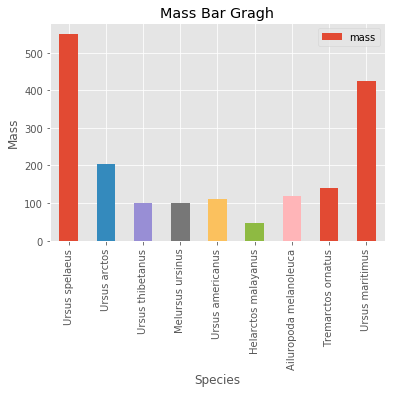

In [31]:
#dataframe.plot.bar command(x=what I want to be on X axis, y= what I want on y-axis)
bar_bears_df.plot.bar(x='species', y='mass')
#add labels and title
plt.title('Mass Bar Gragh')
plt.xlabel('Species')
plt.ylabel('Mass')

# 9 Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

Might be some clues here https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py

https://stackoverflow.com/questions/49889398/plot-stacked-bar-chart-from-pandas-data-frame

Ask What type of grpah are you looking for. 
I was trying to create a stacked bargraph

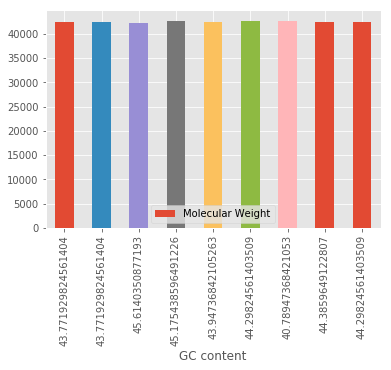

In [32]:
bears_df.plot.bar(x='GC content', y='Molecular Weight') #first attempt but not very good. 

Found a better way to do things on youtube and created a scatter plot. 

https://www.youtube.com/watch?v=yejsG6TKWNU

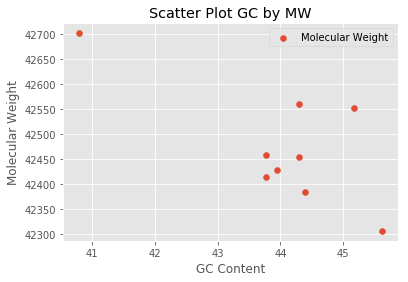

In [33]:
fig, ax =plt.subplots()         #scatter plot
my_scatter_plot =ax.scatter(
bears_df["GC content"],         #pull GC from dataframe
bears_df["Molecular Weight"]    #pulls MW from dataframe
)

#Add Titles and labels to X and Y
plt.title('Scatter Plot GC by MW')
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.legend ()

Could not get point from youtube video so went back to class notes and https://fcpython.com/?s=scatter

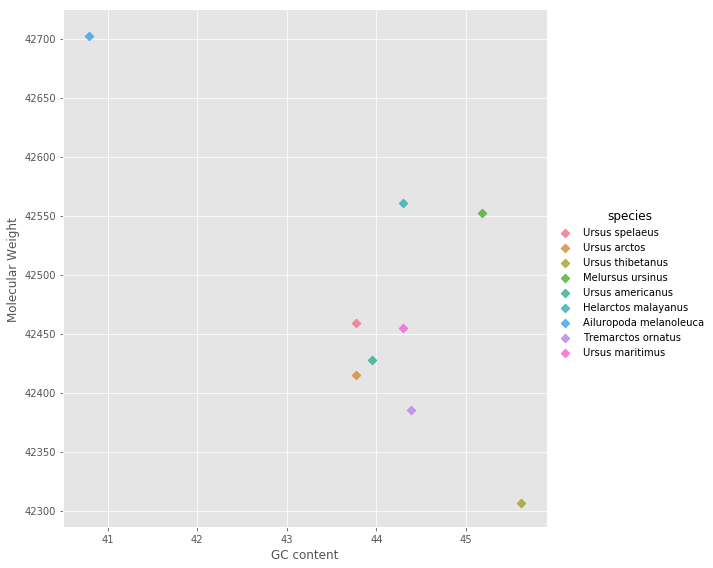

In [34]:
MWGC = sns.lmplot("GC content", "Molecular Weight", data=bears_df, fit_reg=False, 
                       height=8, hue='species', markers='D')

# 10 Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [35]:
bears_df # view dataframe

,species,mass,Molecular Weight,GC content
0,Ursus spelaeus,550.800,42458.8,43.7719
1,Ursus arctos,203.500,42414.7,43.7719
2,Ursus thibetanus,99.714,42306.7,45.614
3,Melursus ursinus,100.030,42552,45.1754
4,Ursus americanus,110.560,42427.7,43.9474
5,Helarctos malayanus,47.020,42560.9,44.2982
6,Ailuropoda melanoleuca,118.200,42702.2,40.7895
7,Tremarctos ornatus,140.700,42384.8,44.386
8,Ursus maritimus,425.100,42454.8,44.2982


In [36]:
bears_df.to_csv('bears_mass_cytb.csv', index=False, header=False) 
#writes dataframe to CSV file
#https://stackoverflow.com/questions/46090719/write-pandas-dataframe-to-csv-file-line-by-line

# 11 - BONUS

I have spent several hours trying to make 3D graph and need something ASAP

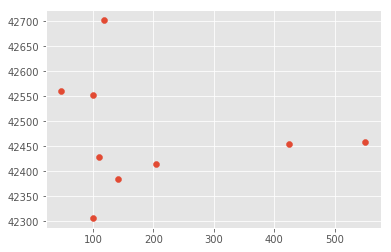

In [37]:
fig, ax =plt.subplots()         #scatter plot
my_scatter_plot =ax.scatter(
bears_df["mass"],         #pull mass from dataframe
bears_df["Molecular Weight"]    #pulls MW from dataframe
)

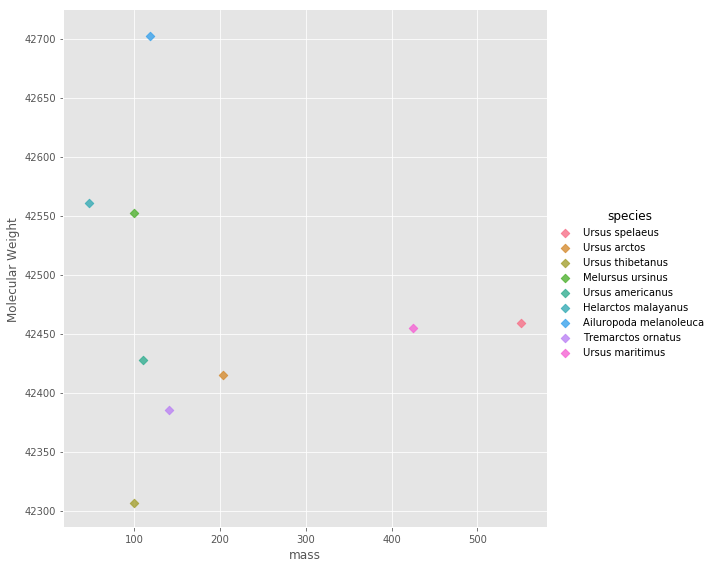

In [38]:
MassMW = sns.lmplot("mass", "Molecular Weight", data=bears_df, fit_reg=False, 
                       height=8, hue='species', markers='D')

Molecular Weight has little to do with the Mass